The goal of this problem is to analyze the GC content of Human chromosome 21 and classify it into high and low GC regions.Download Human Chromosome 21 from Ensembl https://grch37.ensembl.org/Homo_sapiens/Info/Index as a FASTA file and plot the GC-content vs. chromosomal position. Use BioPython’s SeqIO (see https://biopython.org/wiki/SeqIO) to read the FASTA file and any of the many Python plotting libraries to create a plot. Given the size of the data it is appropriate to compute the GC-content for non-overlapping consecutive windows. Try different window sizes between 1kb-1Mb.

In [13]:
import urllib.request
import os
import gzip
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

In [2]:

window_size = 10000 # Defining the window size in base pairs

In [3]:
# URL of the FASTA file
url = "https://ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/dna/Homo_sapiens.GRCh37.dna.chromosome.21.fa.gz"

In [4]:
# Filename of the downloaded FASTA file
filename = "human_chr21.fasta.gz"

In [5]:
# Downloading the FASTA file
urllib.request.urlretrieve(url, filename)

('human_chr21.fasta.gz', <http.client.HTTPMessage at 0x1bcc4eef760>)

In [6]:
# As downloaded file is in Zip format we need to Decompress the file
with gzip.open(filename, "rt") as handle:
    record = SeqIO.read(handle, "fasta")
    sequence = record.seq

In [7]:
# Computing the GC content
gc_content = []
for i in range(0, len(sequence), window_size):
    window = sequence[i:i+window_size]
    gc_count = window.count("G") + window.count("C")
    gc_content.append(gc_count / len(window))

In [8]:
# x-axis data for the plot
x = np.arange(0, len(sequence), window_size)

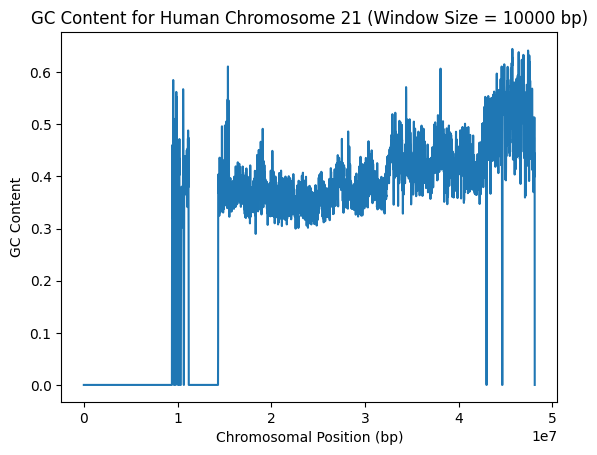

In [9]:
# Ploting the GC content vs. chromosomal position
plt.plot(x, gc_content)
plt.xlabel("Chromosomal Position (bp)")
plt.ylabel("GC Content")
plt.title(f"GC Content for Human Chromosome 21 (Window Size = {window_size} bp)")
plt.show()